# Scikit-Learn Overview
There are several Python libraries that provide solid implementations of a range of machine learning algorithms.
One of the best known is [Scikit-Learn](http://scikit-learn.org), a package that provides efficient versions of a large number of common algorithms:

__Supervised learning:__

* Linear models (Ridge, Lasso, Elastic Net, ...)
* Support Vector Machines
* Tree-based methods (Random Forests, Bagging, GBRT, ...)
* Nearest neighbors 
* Neural networks (basics)
* Gaussian Processes
* Feature selection

__Unsupervised learning:__

* Clustering (KMeans, Ward, ...)
* Matrix decomposition (PCA, ICA, ...)
* Density estimation
* Outlier detection

__Model selection and evaluation:__

* Cross-validation
* Grid-search
* Lots of metrics

_... and many [more](https://scikit-learn.org/stable/modules/classes.html)!_

Scikit-Learn is characterized by a clean, uniform, and streamlined API, as well as by very useful and complete online documentation.
A benefit of this uniformity is that once you understand the basic use and syntax of Scikit-Learn for one type of model, switching to a new model or algorithm is straightforward.

Scikit-Learn builds upon NumPy and SciPy and __complements__ this scientific environment with machine learning algorithms. By design, Scikit-Learn is __non-intrusive__, easy to use and easy to combine with other libraries. Core algorithms are implemented in low-level languages.

In [1]:
%%capture
%pip install numpy seaborn scikit-learn

# Some of the samples here generate alot of warnings due to simplified data/config
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)

# Data Representation in Scikit-Learn
Machine learning is about creating models from data: for that reason, we'll start by discussing how data can be represented.

As an example, let's consider the [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), famously analyzed by Ronald Fisher in 1936.
We can download this dataset in the form of a Pandas `DataFrame` using the [Seaborn](http://seaborn.pydata.org/) library, and take a look at the first few items:

In [2]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Here each row of the data refers to a single observed flower, and the number of rows is the total number of flowers in the dataset.
In general, we will refer to the rows of the matrix as _samples_, and the number of rows as `n_samples`.

Likewise, each column of the data refers to a particular quantitative piece of information that describes each sample.
In general, we will refer to the columns of the matrix as _features_, and the number of columns as `n_features`.

## The Features Matrix

This layout makes clear that the information can be thought of as a two-dimensional numerical array or matrix, which is called the *features matrix*.
By convention, this matrix is often stored in a variable named `X`.

The features matrix is assumed to be two-dimensional, with shape `[n_samples, n_features]`, and is most often contained in a __NumPy__ array or a __Pandas__ `DataFrame`, though some Scikit-Learn models also accept __SciPy__ sparse matrices.

The samples (i.e., rows) always refer to the individual objects described by the dataset.
For example, a sample might represent a flower, a person, a document, an image, a sound file, a video, an astronomical object, or anything else you can describe with a set of quantitative measurements.

The features (i.e., columns) always refer to the distinct observations that describe each sample in a quantitative manner.

Features are often real-valued, but may be Boolean or discrete-valued in some cases.

## The Target Array

In addition to the feature matrix `X`, we also generally work with a _label_ or _target_ array, which by convention is usually called `y`.
The target array is usually one-dimensional, with length `n_samples`, and is generally contained in a __NumPy__ array or __Pandas__ `Series`.

The target array may have continuous numerical values, or discrete classes/labels.

While some Scikit-Learn estimators do handle multiple target values in the form of a two-dimensional, `[n_samples, n_targets]` target array, we will primarily be working with the common case of a one-dimensional target array.

A common point of confusion is how the target array differs from the other feature columns. The distinguishing characteristic of the target array is that it is usually the quantity we want to _predict from the features_: in statistical terms, it is the dependent variable.

For example, we may wish to construct a model that can predict the species of flower based on the other measurements; in this case, the `species` column would be considered the target array. With this in mind, we can visualize the data:

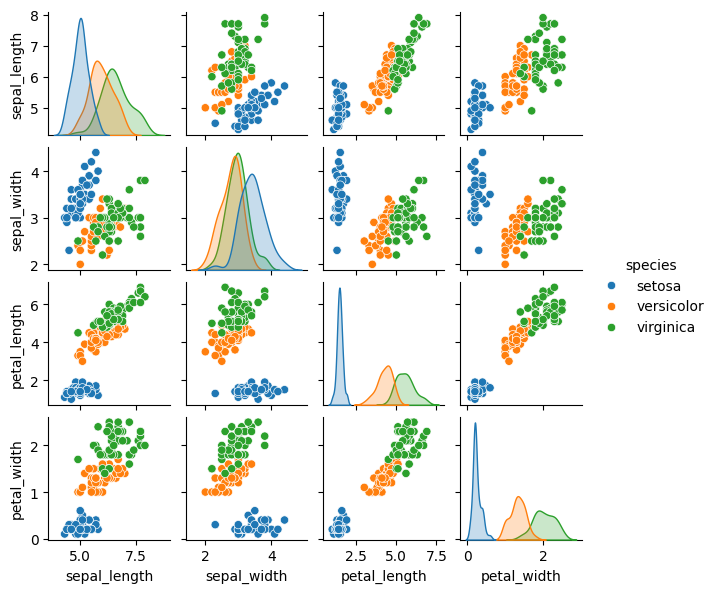

In [3]:
%matplotlib inline
import seaborn as sns
sns.pairplot(iris, hue='species', height=1.5);

For use in Scikit-Learn, we will extract the features matrix and target array from the `DataFrame`:

In [4]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [5]:
y_iris = iris['species']
y_iris.shape

(150,)

To summarize, the expected layout of features and target values is visualized in the following figure.

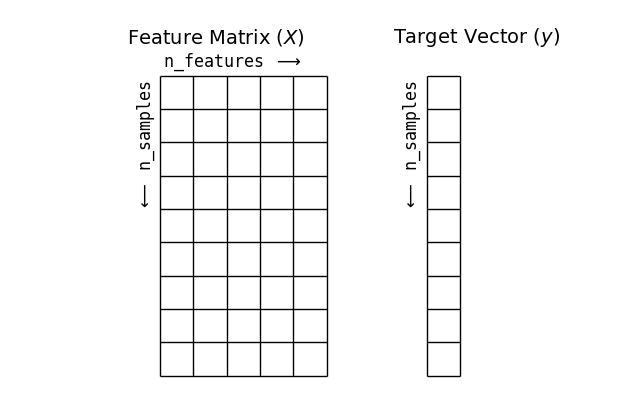

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 4))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
ax.axis('equal')

# Draw features matrix
ax.vlines(range(6), ymin=0, ymax=9, lw=1, color='black')
ax.hlines(range(10), xmin=0, xmax=5, lw=1, color='black')
font_prop = dict(size=12, family='monospace')
ax.text(-1, -1, "Feature Matrix ($X$)", size=14)
ax.text(0.1, -0.3, r'n_features $\longrightarrow$', **font_prop)
ax.text(-0.1, 0.1, r'$\longleftarrow$ n_samples', rotation=90,
        va='top', ha='right', **font_prop)

# Draw labels vector
ax.vlines(range(8, 10), ymin=0, ymax=9, lw=1, color='black')
ax.hlines(range(10), xmin=8, xmax=9, lw=1, color='black')
ax.text(7, -1, "Target Vector ($y$)", size=14)
ax.text(7.9, 0.1, r'$\longleftarrow$ n_samples', rotation=90,
        va='top', ha='right', **font_prop)

ax.set_ylim(10, -2);

## Loading external data
Numpy provides some [simple tools](https://docs.scipy.org/doc/numpy/reference/routines.io.html) for loading data from files (CSV, binary, etc);

For structured data, Pandas provides more [advanced tools](http://pandas.pydata.org/pandas-docs/stable/io.html) (CSV, JSON, Excel, HDF5, SQL, etc);

With this data properly formatted, we can move on to Scikit-Learn's Estimator API.

# The Estimator API
The Scikit-Learn API is designed with the following guiding principles in mind, as outlined in the [Scikit-Learn API paper](http://arxiv.org/abs/1309.0238):

- __Consistency__: All objects share a common interface drawn from a limited set of methods, with consistent documentation.
- __Inspection__: All specified parameter values are exposed as public attributes.
- __Limited object hierarchy__: Only algorithms are represented by Python classes; datasets are represented
  in standard formats (NumPy arrays, Pandas `DataFrame` objects, SciPy sparse matrices) and parameter
  names use standard Python strings.
- __Composition__: Many machine learning tasks can be expressed as sequences of more fundamental algorithms,
  and Scikit-Learn makes use of this wherever possible.
- __Sensible defaults__: When models require user-specified parameters, the library defines an appropriate default value.

In practice, these principles make Scikit-Learn very easy to use, once the basic principles are understood.
Every machine learning algorithm in Scikit-Learn is implemented via the _Estimator API_, which provides a consistent interface for a wide range of machine learning applications and consists of complementary interfaces:

- an `estimator` interface for building and fitting models;
- a `predictor` interface for making predictions;
- a `transformer` interface for converting data.

Goal: enforce a simple and consistent API to _make it trivial to swap or plug algorithms_. 

<img src="images/sklearn_api.png" style="background:white; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;" width="50%">

## Basics of the API

Usually, the steps in using the Scikit-Learn Estimator API are as follows:

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector.
4. Fit the model to your data by calling the `fit()` method of the model instance.
5. Apply the model to new data:
   - For supervised learning, often we predict labels for unknown data using the `predict()` method.
   - For unsupervised learning, we often transform or infer properties of the data using the `transform()` or `predict()` method.

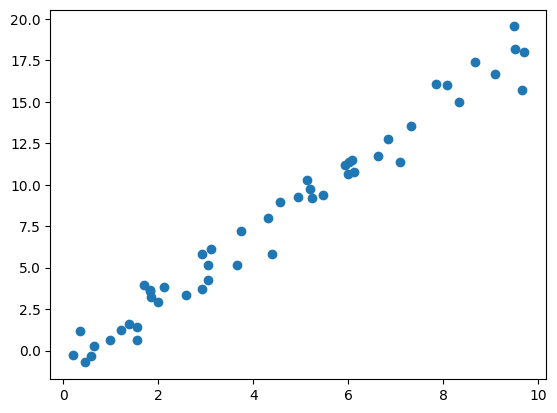

In [7]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

With this data in place, we can walk through the outlined process:

### 1. Choose a class of model

In Scikit-Learn, every class of model is represented by a Python class.
So, for example, if we would like to compute a simple `LinearRegression` model, we can import the linear regression class:

In [8]:
from sklearn.linear_model import LinearRegression

> Note: Other more general linear regression models exist as well. You can read more about them in the `sklearn.linear_model` [module documentation](http://Scikit-Learn.org/stable/modules/linear_model.html).

### 2. Choose model hyperparameters

An important point is that _a class of model is not the same as an instance of a model_.

Once we have decided on our model class, there are still some options open to us.
Depending on the model class we are working with, we might need to answer one or more questions like the following:

- Would we like to fit for the offset (i.e., $y$-intercept)?
- Would we like the model to be normalized?
- Would we like to preprocess our features to add model flexibility?
- What degree of regularization would we like to use in our model?
- How many model components would we like to use?

These are examples of the important choices that must be made _once the model class is selected_.
These choices are often represented as __hyperparameters__, or parameters that must be set before the model is fit to data.
In Scikit-Learn, hyperparameters are chosen by passing values at model instantiation.

For our linear regression example, we can instantiate the `LinearRegression` class and specify that we would like to fit the intercept using the `fit_intercept` hyperparameter:

In [9]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

Keep in mind that when the model is instantiated, the only action is the storing of these hyperparameter values.
In particular, we have not yet applied the model to any data: the Scikit-Learn API makes very clear the distinction between _choice of model_ and _application of model to data_.

### 3. Arrange data into a features matrix and target vector

Scikit-Learn data representation requires a two-dimensional features matrix and a one-dimensional target array.

Here our target variable `y` is already in the correct form (a length-`n_samples` array), but we need to transform the data `x` to make it a matrix of size `[n_samples, n_features]`.
In this case, this amounts to a simple reshaping of the one-dimensional array:

In [10]:
X = x[:, np.newaxis]
X.shape

(50, 1)

### 4. Fit the model to the data

Now it is time to apply our model to the data.
This can be done with the `fit()` method of the model:

In [11]:
model.fit(X, y)

LinearRegression()

This `fit()` method causes a number of model-dependent internal computations to take place, and the results of these computations are stored in model-specific attributes that the user can explore.
In Scikit-Learn, by convention all model parameters that were learned during the `fit()` process __have trailing underscores__.

For example in this linear model, we have the following:

In [12]:
model.coef_

array([1.9776566])

In [13]:
model.intercept_

-0.9033107255311146

These two parameters represent the slope and intercept of the simple linear fit to the data.

Comparing the results to the data definition, we see that they are close to the values used to generate the data: a slope of ~`2` and intercept of ~`-1`.

In general, Scikit-Learn does not provide tools to draw conclusions from internal model parameters themselves: interpreting model parameters is much more a _statistical modeling_ question than a _machine learning_ question. Machine learning instead focuses on what the model _predicts_.

If you would like to dive into the meaning of fit parameters within the model, other tools are available, including the `statsmodels` [Python package](http://statsmodels.sourceforge.net/).

### 5. Predict labels for unknown data

Once the model is trained, the main task of supervised machine learning is to evaluate it based on what it says about new data that was not part of the training set.
In Scikit-Learn, this can be done using the `predict` method.

For this example, our "new data" will be a grid of $x$ values, and we will ask what $y$ values the model predicts:

In [14]:
xfit = np.linspace(-1, 11)

As before, we need to coerce these $x$ values into a `[n_samples, n_features]` features matrix, after which we can feed it to the model:

In [15]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

Finally, let's visualize the results by plotting first the raw data, and then this model fit:

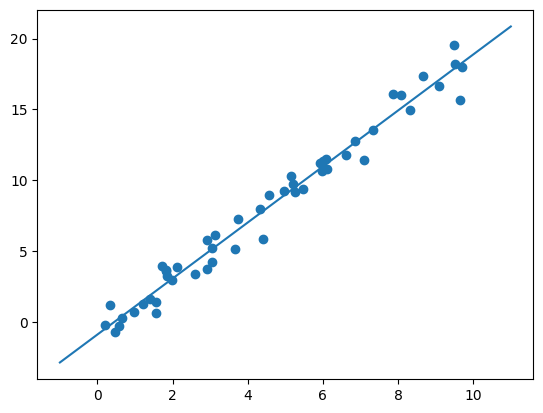

In [16]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

Typically the efficacy of the model is evaluated by comparing its results to some known _baseline_.

## Supervised Learning Example: Classification

When we train the models, a question usually appears: given a model trained on a portion of the Iris data, how well can we predict the remaining labels?

For this example, we will use a simple model known as _Gaussian naive Bayes_, which proceeds by assuming each class is drawn from an axis-aligned Gaussian distribution.
Because it is so fast and has no hyperparameters to choose, Gaussian naive Bayes is often a good model to use as a _baseline_ classification, before exploring whether improvements can be found through more sophisticated models.

We would like to evaluate the model on data it has not seen before, so we will split the data into a _training set_ and a _testing set_.
This could be done by hand, but it is more convenient to use the `train_test_split` utility function:

In [17]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

With the data arranged, we can follow our recipe to predict the labels:

In [18]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

Finally, we can use the ``accuracy_score`` utility to see the fraction of predicted labels that match their true values:

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

With an accuracy topping 97%, we see that even this very naive classification algorithm is effective for this particular dataset.

## Unsupervised Learning Example: Dimensionality reduction

The Iris data is four-dimensional: there are four features recorded for each sample.

The task of dimensionality reduction centers around determining whether there is a suitable lower-dimensional representation that retains the essential features of the data.
Often dimensionality reduction is used as an aid to visualizing data: it is much easier to plot data in two dimensions than in four dimensions or more.

Here we will use _principal component analysis_ (PCA), which is a fast linear dimensionality reduction technique.
We will ask the model to return two components (a two-dimensional representation of the data).

Following the sequence of steps outlined earlier, we have:

In [20]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model
model.fit(X_iris)                      # 3. Fit to data
X_2D = model.transform(X_iris)         # 4. Transform the data

Now let's plot the results. A quick way to do this is to insert the results into the original Iris `DataFrame`, and use Seaborn's `lmplot` to show the results:

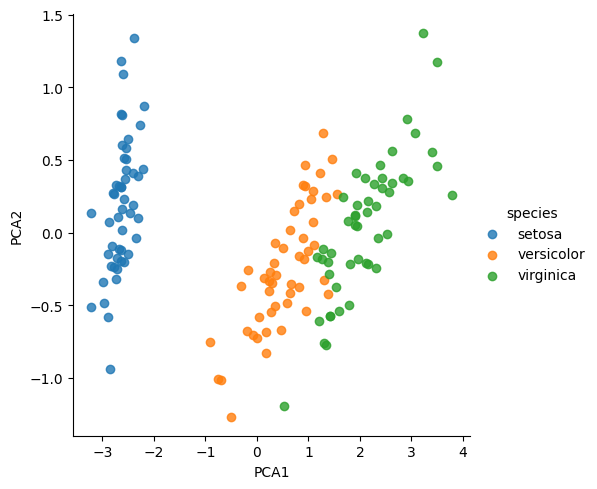

In [21]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot(x="PCA1", y="PCA2", hue='species', data=iris, fit_reg=False);

We see that in the two-dimensional representation, the species are fairly well separated, even though the PCA algorithm had no knowledge of the species labels.
This suggests to us that a relatively straightforward classification will probably be effective on the dataset, as we saw before.

## Unsupervised Learning Example: Clustering

A clustering algorithm attempts to find distinct groups of data without reference to any labels.

Here we will use a powerful clustering method called a _Gaussian mixture model_ (GMM).
A GMM attempts to model the data as a collection of Gaussian blobs.

We can fit the Gaussian mixture model as follows:

In [22]:
from sklearn.mixture import GaussianMixture      # 1. Choose the model class
model = GaussianMixture(n_components=3,
                        covariance_type='full')  # 2. Instantiate the model
model.fit(X_iris)                                # 3. Fit to data
y_gmm = model.predict(X_iris)                    # 4. Determine labels

As before, we will add the cluster label to the Iris `DataFrame` and use Seaborn to plot the results:

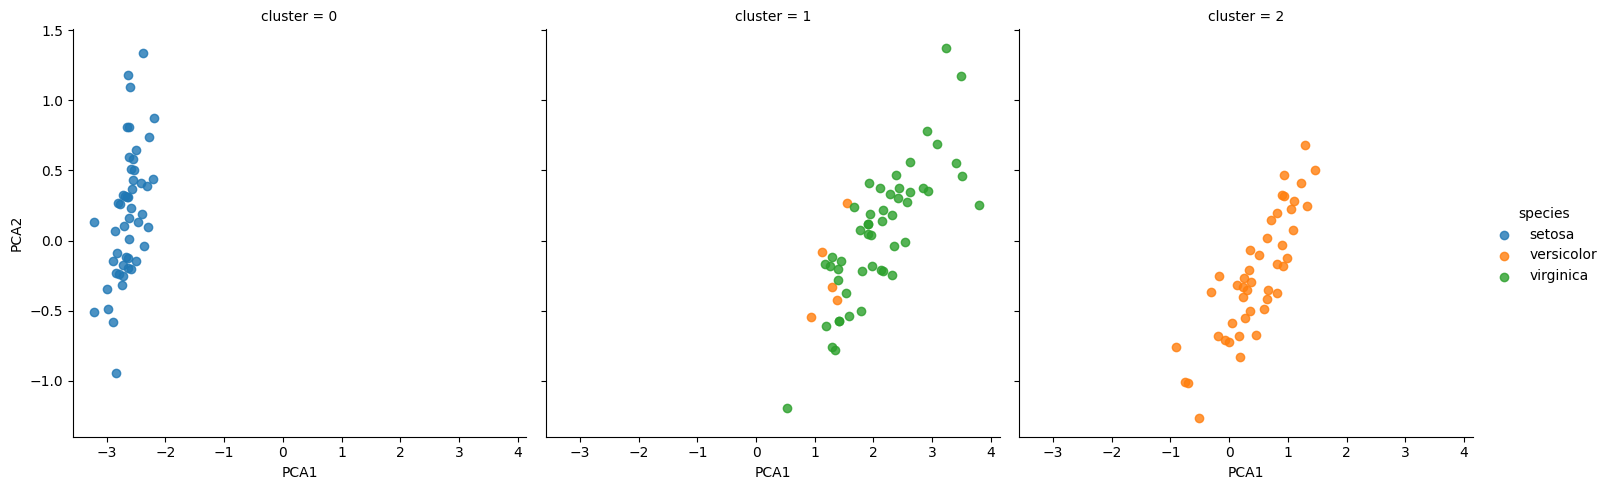

In [23]:
iris['cluster'] = y_gmm
sns.lmplot(x="PCA1", y="PCA2", data=iris, hue='species', col='cluster', fit_reg=False);

By splitting the data by cluster number, we see exactly how well the GMM algorithm has recovered the underlying labels: the _setosa_ species is separated perfectly within cluster 0, while there remains a small amount of mixing between _versicolor_ and _virginica_.

This means that even without an expert to tell us the species labels of the individual flowers, the measurements of these flowers are distinct enough that we could _automatically_ identify the presence of these different groups of species with a simple clustering algorithm.
This sort of algorithm might further give experts in the field clues as to the relationships between the samples they are observing.

# Model evaluation and selection
## Evaluation
We want to learn an estimator $\varphi$ minimizing the generalization error $Err(\varphi) = \mathbb{E}_{X,Y}\{ \ell(Y, \varphi(X)) \}$.

__Issue__: Since $P_{X,Y}$ is unknown, the generalization error $Err(\varphi)$ cannot be evaluated.

__Solution__: Use a proxy to approximate $Err(\varphi)$.

### Training error

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import zero_one_loss
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=20, random_state=123)
labels = ["b", "r"]
y = np.take(labels, (y < 10))

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)
print("Training error =", zero_one_loss(y, clf.predict(X)))

Training error = 0.0


### Test error

__Issue__: the training error is a __biased__ estimate of the generalization error.

__Solution__: Divide ${\cal L}$ into two disjoint parts called training and test sets (usually using ~70% for training and ~30% for test).
- Use the training set for fitting the model;
- Use the test set for evaluation only, thereby yielding an unbiased estimate.

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import zero_one_loss
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
print("Training error =", zero_one_loss(y_train, clf.predict(X_train)))
print("Test error =", zero_one_loss(y_test, clf.predict(X_test)))

Training error = 0.14222222222222225
Test error = 0.16000000000000003


__Summary__: Beware of bias when you estimate model performance:
- Training score is often an optimistic estimate of the true performance;
- _The same data should not be used both for training and evaluation._

### Cross-validation

__Issue__: 
- When ${\cal L}$ is small, training on 70% of the data may lead to a model that is significantly different from a model that would have been learned on the entire set ${\cal L}$. 
- Yet, increasing the size of the training set (and decreasing the size of the test set), might lead to an inaccurate estimate of the generalization error.

__Solution__: K-Fold cross-validation. 
- Split ${\cal L}$ into $K$ small disjoint folds. 
- Train on K-1 folds, evaluate the test error one the held-out fold.
- Repeat for all combinations and average the $K$ estimates of the generalization error.

In [26]:
from sklearn.model_selection import KFold

scores = []

for train, test in KFold(n_splits=5, random_state=42, shuffle=True).split(X):
    X_train, y_train = X[train], y[train]
    X_test, y_test = X[test], y[test]
    clf = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
    scores.append(zero_one_loss(y_test, clf.predict(X_test)))

print("CV error = %f +-%f" % (np.mean(scores), np.std(scores)))

CV error = 0.193333 +-0.032660


In [27]:
# Shortcut
from sklearn.model_selection import cross_val_score
scores = cross_val_score(KNeighborsClassifier(n_neighbors=5), X, y, 
                         cv=KFold(n_splits=5, random_state=42, shuffle=True), 
                         scoring="accuracy")
print("CV error = %f +-%f" % (1. - np.mean(scores), np.std(scores)))

CV error = 0.193333 +-0.032660


## Metrics
### Default score

Estimators come with a built-in default evaluation score
* Accuracy for classification 
* R2 score for regression

In [28]:
y_train = (y_train == "r")
y_test = (y_test == "r")
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train) 
print("Default score =", clf.score(X_test, y_test))

Default score = 0.8


### Accuracy

__Definition__: The accuracy is the proportion of correct predictions.

In [29]:
from sklearn.metrics import accuracy_score
print("Accuracy =", accuracy_score(y_test, clf.predict(X_test)))

Accuracy = 0.8


### Precision, recall and F-measure

$$Precision = \frac{TP}{TP + FP}$$
$$Recall = \frac{TP}{TP + FN}$$
$$F = \frac{2 * Precision * Recall}{Precision + Recall}$$

In [30]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score
print("Precision =", precision_score(y_test, clf.predict(X_test)))
print("Recall =", recall_score(y_test, clf.predict(X_test)))
print("F =", fbeta_score(y_test, clf.predict(X_test), beta=1))

Precision = 0.7307692307692307
Recall = 0.7916666666666666
F = 0.76


### ROC AUC

__Definition__: Area under the curve of the false positive rate (FPR) against the true positive rate (TPR) as the decision threshold of the classifier is varied.

ROC AUC = 0.8634259259259258


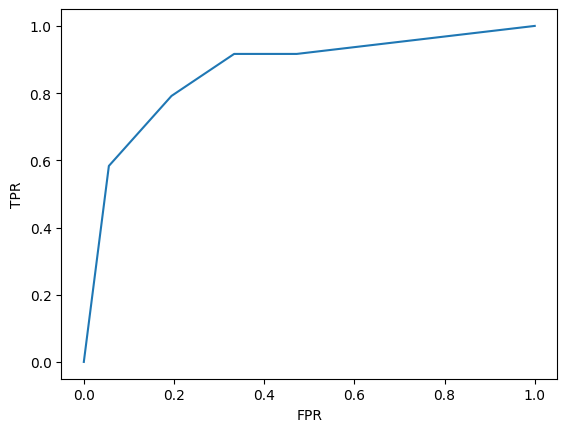

In [31]:
from sklearn.metrics import get_scorer
roc_auc_scorer = get_scorer("roc_auc")
print("ROC AUC =", roc_auc_scorer(clf, X_test, y_test))

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

### Confusion matrix

__Definition__: number of samples of class $i$ predicted as class $j$.

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, clf.predict(X_test))

array([[29,  7],
       [ 5, 19]])

## Model selection
Finding good hyper-parameters is crucial to control under- and over-fitting and achieving better performance. The estimated generalization error can be used to select the best model.

### Under- and over-fitting

__Under-fitting__: the model is too simple and does not capture the true relation between X and Y.

__Over-fitting__: the model is too specific to the training set and does not generalize.

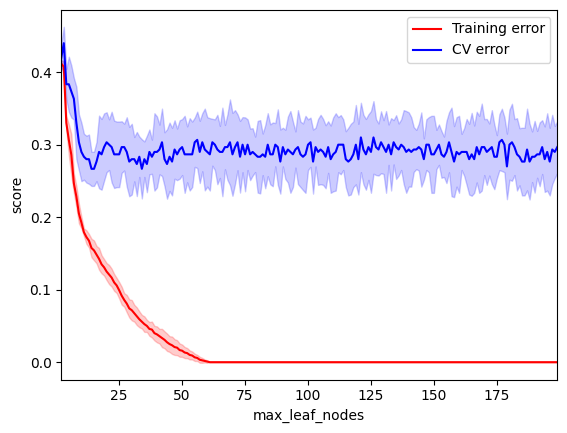

In [33]:
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeClassifier

# Evaluate parameter range in CV
param_range = range(2, 200)
param_name = "max_leaf_nodes"

train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(), X, y, 
    param_name=param_name, 
    param_range=param_range, cv=5, n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot parameter VS estimated error
plt.xlabel(param_name)
plt.ylabel("score")
plt.xlim(min(param_range), max(param_range))
plt.plot(param_range, 1. - train_scores_mean, color="red", label="Training error")
plt.fill_between(param_range, 
                 1. - train_scores_mean + train_scores_std,
                 1. - train_scores_mean - train_scores_std,
                 alpha=0.2, color="red")
plt.plot(param_range, 1. - test_scores_mean, color="blue", label="CV error")
plt.fill_between(param_range, 
                 1. - test_scores_mean + test_scores_std,
                 1. - test_scores_mean - test_scores_std, 
                 alpha=0.2, color="blue")
plt.legend(loc="best");

In [34]:
# Best trade-off
print("%s = %d, CV error = %f" % (param_name,
                                  param_range[np.argmax(test_scores_mean)],
                                   1. - np.max(test_scores_mean)))

max_leaf_nodes = 14, CV error = 0.266667


### Hyper-parameter search

In [35]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(KNeighborsClassifier(),
                    param_grid={"n_neighbors": list(range(1, 100))},
                    scoring="accuracy",
                    cv=5, n_jobs=-1)
grid.fit(X, y)  # Note that GridSearchCV is itself an estimator

print("Best score = %f, Best parameters = %s" % (1. - grid.best_score_, 
                                                 grid.best_params_))

Best score = 0.196667, Best parameters = {'n_neighbors': 11}


### Selection and evaluation, _simultaneously_

`grid.best_score_` is not independent from the best model, since its construction was guided by the optimization of this quantity. 

As a result, the optimized `grid.best_score_` estimate _may_ in fact be a biased, optimistic, estimate of the true performance of the model. 

__Solution__: Use __nested__ cross-validation for correctly selecting the model __and__ correctly evaluating its performance. 

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

scores = cross_val_score(
            GridSearchCV(KNeighborsClassifier(),
                         param_grid={"n_neighbors": list(range(1, 100))},
                         scoring="accuracy",
                         cv=5, n_jobs=-1), 
            X, y, cv=5, scoring="accuracy")

# Unbiased estimate of the accuracy
print("%f +-%f" % (1. - np.mean(scores), np.std(scores)))

0.223333 +-0.062004


# Transformers, pipelines and feature unions
## Transformers

Classification (or regression) is often only one or the last step of a long and complicated process. In most cases, input data needs to be cleaned, edited or extended before being fed to a learning algorithm.

For this purpose, Scikit-Learn provides the `transformer` API.

```python
class Transformer(object):    
    def fit(self, X, y=None):
        """Fits estimator to data."""
        # set state of ``self``
        return self
    
    def transform(self, X):
        """Transform X into Xt."""
        # transform X in some way to produce Xt
        return Xt
    
    # Shortcut
    def fit_transform(self, X, y=None):
        self.fit(X, y)
        Xt = self.transform(X)
        return Xt
```

Let's first load digits data and plot a sample digit.

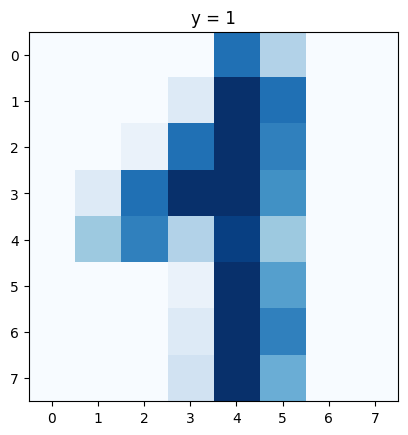

In [37]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

sample_id = 42
plt.imshow(X[sample_id].reshape((8, 8)), interpolation="nearest", cmap=plt.cm.Blues)
plt.title("y = %d" % y[sample_id])
plt.show()

### Scalers and other normalizers

In [38]:
from sklearn.preprocessing import StandardScaler
tf = StandardScaler()
tf.fit(X_train, y_train)
Xt_train = tf.transform(X_train)  
print("Mean (before scaling) =", np.mean(X_train))
print("Mean (after scaling) =", np.mean(Xt_train))

# Shortcut: Xt = tf.fit_transform(X)
# See also Binarizer, MinMaxScaler, Normalizer, ...

Mean (before scaling) = 4.8921213808463255
Mean (after scaling) = -2.307813265739004e-18


Scaling is critical for some algorithms:

In [39]:
from sklearn.svm import SVC
clf = SVC()
print("Without scaling =", clf.fit(X_train, y_train).score(X_test, y_test))
print("With scaling =", clf.fit(tf.transform(X_train), y_train).score(tf.transform(X_test), y_test))

Without scaling = 0.9911111111111112
With scaling = 0.9844444444444445


### Feature selection
For example, lets select the 10 top features, as ranked using ANOVA F-score and plot support:

Shape = (1347, 10)


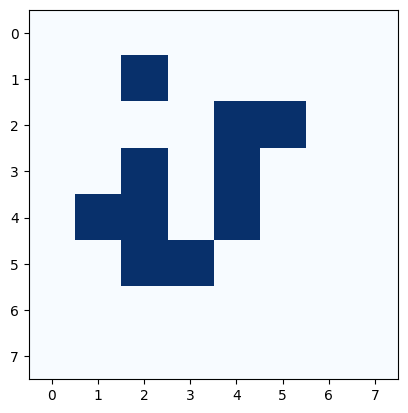

In [40]:
from sklearn.feature_selection import SelectKBest, f_classif
tf = SelectKBest(score_func=f_classif, k=10)
Xt = tf.fit_transform(X_train, y_train)
print("Shape =", Xt.shape)

plt.imshow(tf.get_support().reshape((8, 8)), interpolation="nearest", cmap=plt.cm.Blues)
plt.show()

Or we can do feature selection using backward elimination:

Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 fe

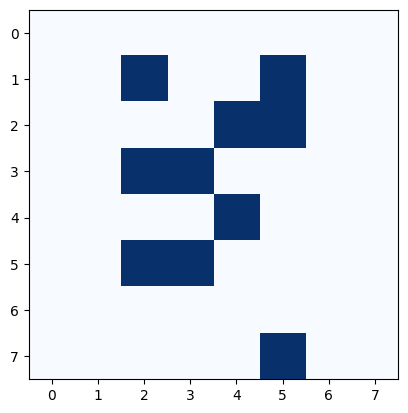

In [41]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
tf = RFE(RandomForestClassifier(), n_features_to_select=10, verbose=1)
Xt = tf.fit_transform(X_train, y_train)
print("Shape =", Xt.shape)

plt.imshow(tf.get_support().reshape((8, 8)), interpolation="nearest", cmap=plt.cm.Blues)
plt.show()

### Decomposition, factorization or embeddings
Compute decomposition:

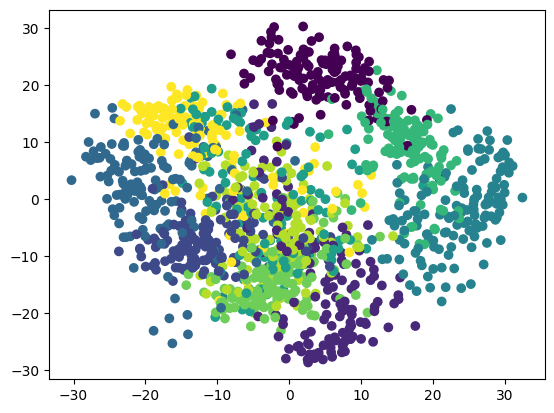

In [42]:
from sklearn.decomposition import PCA
tf = PCA(n_components=2)
Xt_train = tf.fit_transform(X_train)

plt.scatter(Xt_train[:, 0], Xt_train[:, 1], c=y_train)
plt.show()

# See also: KernelPCA, NMF, FastICA, Kernel approximations, 
#           manifold learning, etc

### Function transformer

In [43]:
from sklearn.preprocessing import FunctionTransformer

def increment(X):
    return X + 1

tf = FunctionTransformer(func=increment)
Xt = tf.fit_transform(X)
print(X[0])
print(Xt[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[ 1.  1.  6. 14. 10.  2.  1.  1.  1.  1. 14. 16. 11. 16.  6.  1.  1.  4.
 16.  3.  1. 12.  9.  1.  1.  5. 13.  1.  1.  9.  9.  1.  1.  6.  9.  1.
  1. 10.  9.  1.  1.  5. 12.  1.  2. 13.  8.  1.  1.  3. 15.  6. 11. 13.
  1.  1.  1.  1.  7. 14. 11.  1.  1.  1.]


## Pipelines

Transformers can be chained in sequence to form a pipeline. For example, let's chain transformers to build a new transformer:

In [44]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

tf = make_pipeline(StandardScaler(), SelectKBest(score_func=f_classif, k=10))
tf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('selectkbest', SelectKBest())])

In [45]:
Xt_train = tf.transform(X_train)
print("Mean =", np.mean(Xt_train))
print("Shape =", Xt_train.shape)

Mean = -1.3715004550677509e-17
Shape = (1347, 10)


Or we can chain transformers and a classifier to build a new classifier:

In [46]:
clf = make_pipeline(StandardScaler(), 
                    SelectKBest(score_func=f_classif, k=10), 
                    RandomForestClassifier())
clf.fit(X_train, y_train)
print(clf.predict_proba(X_test)[:5])

[[0.   0.   0.72 0.02 0.01 0.04 0.   0.17 0.04 0.  ]
 [0.01 0.02 0.   0.   0.02 0.   0.   0.02 0.93 0.  ]
 [0.   0.   0.89 0.02 0.   0.01 0.   0.05 0.03 0.  ]
 [0.   0.   0.   0.   0.03 0.   0.97 0.   0.   0.  ]
 [0.   0.01 0.   0.   0.   0.   0.99 0.   0.   0.  ]]


Hyper-parameters of the pipeline steps can be accessed using step name:

In [47]:
print("K =", clf.get_params()["selectkbest__k"])

K = 10


In [48]:
clf.named_steps

{'standardscaler': StandardScaler(),
 'selectkbest': SelectKBest(),
 'randomforestclassifier': RandomForestClassifier()}

In [49]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(clf, 
                    param_grid={"selectkbest__k": [1, 10, 20, 30, 40, 50],
                                "randomforestclassifier__max_features": [0.1, 0.25, 0.5]})
grid.fit(X_train, y_train)

print("Best params =", grid.best_params_)

Best params = {'randomforestclassifier__max_features': 0.1, 'selectkbest__k': 50}


Or you can give your own names using constructor and passing a list of tuples containing custom name and object.

In [50]:
from sklearn.pipeline import Pipeline

clf = Pipeline(
    [
        ("scaler", StandardScaler()), 
        ("best", SelectKBest(score_func=f_classif, k=10)), 
        ("forest", RandomForestClassifier())
    ])
clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('best', SelectKBest()),
                ('forest', RandomForestClassifier())])

In [51]:
clf.named_steps

{'scaler': StandardScaler(),
 'best': SelectKBest(),
 'forest': RandomForestClassifier()}

## Feature unions

Similarly, transformers can be applied in parallel to transform data in union.
## Nested composition

Since pipelines and unions are themselves estimators, they can be composed into nested structures.

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_union
from sklearn.decomposition import PCA

clf = make_pipeline(
    # Build features
    make_union(
        FunctionTransformer(func=lambda X: X), # Identity
        PCA(),
    ), 
    # Select the best features
    RFE(RandomForestClassifier(), n_features_to_select=10),
    # Train
    MLPClassifier()
)

clf.fit(X_train, y_train)

Pipeline(steps=[('featureunion',
                 FeatureUnion(transformer_list=[('functiontransformer',
                                                 FunctionTransformer(func=<function <lambda> at 0x12c88efc0>)),
                                                ('pca', PCA())])),
                ('rfe',
                 RFE(estimator=RandomForestClassifier(),
                     n_features_to_select=10)),
                ('mlpclassifier', MLPClassifier())])

# Application: Classify Handwritten Digits
To demonstrate these principles, let's consider one piece of the optical character recognition problem: the identification of handwritten digits.
In the wild, this problem involves both locating and identifying characters in an image. Here we'll take a shortcut and use Scikit-Learn's set of preformatted digits, which is built into the library.

## Loading and Visualizing the Digits Data

We can use Scikit-Learn's data access interface to take a look at this data:

In [53]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

The images data is a three-dimensional array: 1,797 samples each consisting of an 8 × 8 grid of pixels.
Let's visualize the first hundred of these:

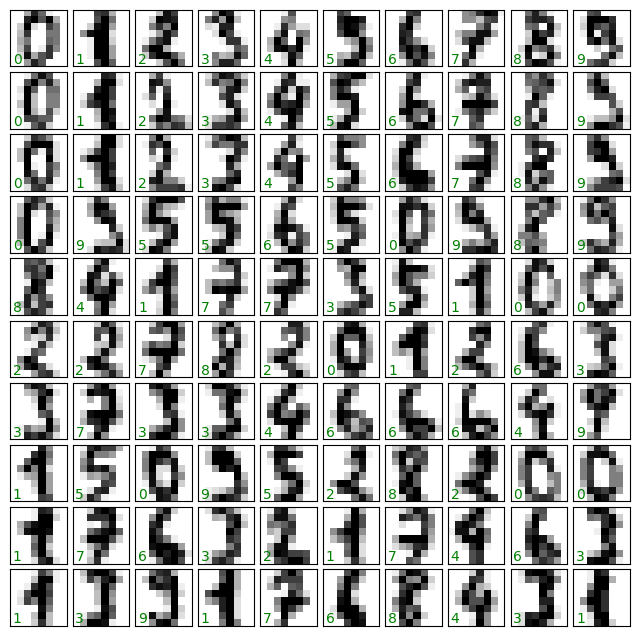

In [54]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In order to work with this data within Scikit-Learn, we need a two-dimensional `[n_samples, n_features]` representation.
We can accomplish this by treating each pixel in the image as a feature: that is, by flattening out the pixel arrays so that we have a length-64 array of pixel values representing each digit.

Additionally, we need the target array, which gives the previously determined label for each digit.
These two quantities are built into the digits dataset under the `data` and `target` attributes, respectively:

In [55]:
X = digits.data
X.shape

(1797, 64)

In [56]:
y = digits.target
y.shape

(1797,)

We see here that there are 1,797 samples and 64 features.

## Applying Dimensionality Reduction

We'd like to visualize our points within the 64-dimensional parameter space, but it's difficult to effectively visualize points in such a high-dimensional space.

Instead, we'll reduce the number of dimensions. Here, we'll make use of a manifold learning algorithm called Isomap to transform the data to two dimensions:

In [57]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
print(data_projected.shape)

/Users/dima/Development/PyCharmProjects/PythonRetrain/venv/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)


We see that the projected data is now two-dimensional.
Let's plot this data to see if we can learn anything from its structure:

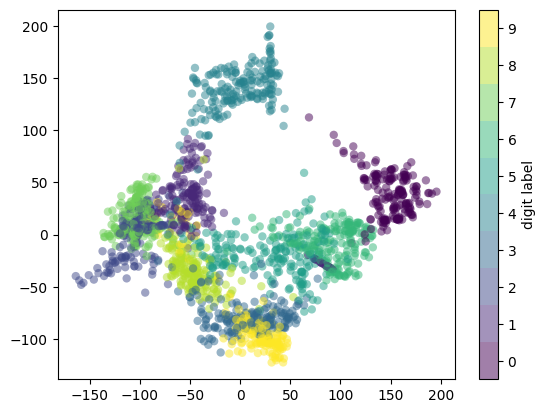

In [58]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.get_cmap('viridis', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

This plot gives us some good intuition into how well various numbers are separated in the larger 64-dimensional space.

For example, zeros and ones have very little overlap in the parameter space.
Intuitively, this makes sense: a zero is empty in the middle of the image, while a one will generally have ink in the middle.

On the other hand, there seems to be a more or less continuous spectrum between ones and fours: we can understand this by realizing that some people draw ones with "hats" on them, which causes them to look similar to fours.

Overall, however, despite some mixing at the edges, the different groups appear to be fairly well localized in the parameter space: this suggests that even a very straightforward supervised classification algorithm should perform suitably on the full high-dimensional dataset.

## Classification on Digits

As we did with the Iris data previously, we will split the data into training and testing sets and fit a Gaussian naive Bayes model:

In [59]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

Now that we have the model's predictions, we can estimate its accuracy by comparing the true values of the test set to the predictions:

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

With even this very simple model, we find about 83% accuracy for classification of the digits!

However, this single number doesn't tell us where we've gone wrong. One nice way to do this is to use the __confusion matrix__, which we can compute with Scikit-Learn and plot with Seaborn:

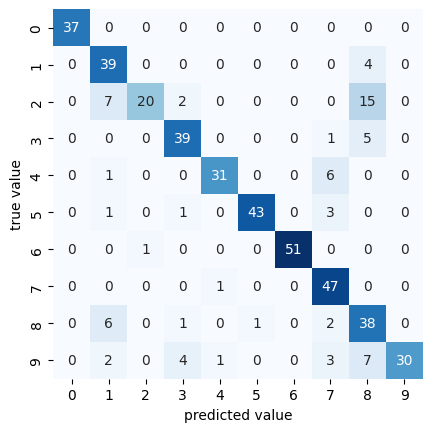

In [61]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False, cmap='Blues')
plt.xlabel('predicted value')
plt.ylabel('true value');

This shows us where the mislabeled points tend to be: for example, many of the twos here are misclassified as either ones or eights.

Another way to gain intuition into the characteristics of the model is to plot the inputs again, with their predicted labels.
We'll use green for correct labels and red for incorrect labels:

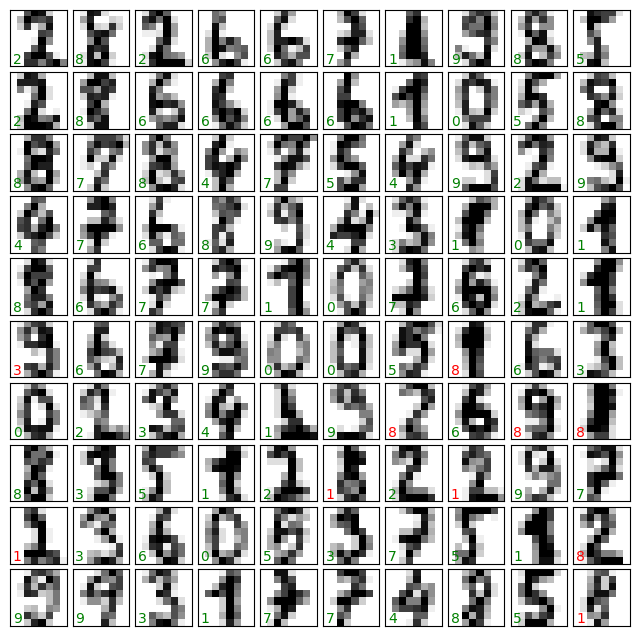

In [62]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

Examining this subset of the data can give us some insight into where the algorithm might be not performing optimally.
To go beyond our 83% classification success rate, we might switch to a more sophisticated algorithm such as support vector machines, random forests, or another classification approach.

# Summary
Regardless of the type of estimator used, the same import/instantiate/fit/predict pattern holds.

Armed with this information about the Estimator API, you can explore the Scikit-Learn documentation and begin trying out various models on your data.